In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#formulae for curve fitting have been documented from https://www.iiserpune.ac.in/~bhasbapat/phy221_files/curvefitting.pdf

In [ ]:
#y = ax+b
xi = np.array([10,12,15,23,20], dtype="float64")
yi = np.array([14,17,23,25,21], dtype = "float64")

In [ ]:
sigma_y, sigma_yx, sigma_x, sigma_x2 = 0,0,0,0
for i in range(xi.size):
  sigma_x +=xi[i]**2
  print(sigma_x)
  sigma_x2 += xi[i]**4
  sigma_y += (yi[i])
  sigma_yx += yi[i]*xi[i]**2
print(sigma_y, sigma_yx, sigma_x, sigma_x2)

100.0
244.0
469.0
998.0
1398.0
100.0 30648.0 1398.0 521202.0


In [ ]:
a = np.array([[5, sigma_x],[sigma_x, sigma_x2]], dtype="float64")
d = np.array([[sigma_y], [sigma_yx]], dtype="float64")
x = np.matmul(np.linalg.inv(a), d)
x

array([[14.23298128],
       [ 0.02062596]])

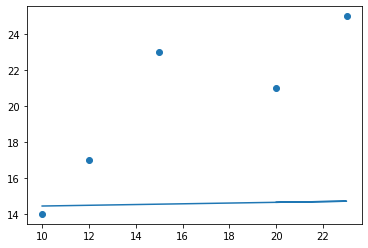

In [ ]:
plt.scatter(xi, yi)
plt.plot(xi, [x[0][0]+x[1][0]*i for i in xi])
plt.show()

In [ ]:
#y = a0+a1*x+a2*x^2
#to plot quadratic eqns, we find coefficients from a matrix method
x = np.array([10,12,15,23,20], dtype="float64")

sigma_x=60.0, sigma_x2=998.0, sigma_x3=18270.0, sigma_x4=361202.0,sigma_y=79.0, sigma_yx=1264.0, sigma_yx2=22248.0
solution matrix= [-0.16835112  1.8985966  -0.03397364]


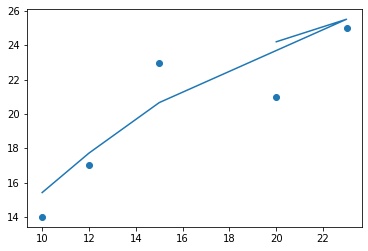

In [ ]:
y = np.array([14,17,23,25,21], dtype = "float64")
sigma_x, sigma_x2, sigma_x3, sigma_x4 = 0,0,0,0
sigma_y, sigma_yx, sigma_yx2 = 0,0,0
for i in range(4):
  sigma_x +=x[i]
  sigma_x2 +=x[i]**2
  sigma_x3 +=x[i]**3
  sigma_x4 +=x[i]**4
  sigma_y +=y[i]
  sigma_yx +=y[i]*x[i]
  sigma_yx2 +=y[i]*(x[i]**2)
print(f"sigma_x={sigma_x}, sigma_x2={sigma_x2}, sigma_x3={sigma_x3}, sigma_x4={sigma_x4},sigma_y={sigma_y}, sigma_yx={sigma_yx}, sigma_yx2={sigma_yx2}")
a = np.array([[6, sigma_x, sigma_x2], [sigma_x, sigma_x2, sigma_x3], [sigma_x2, sigma_x3, sigma_x4]], dtype="float64")
d = np.array([sigma_y, sigma_yx, sigma_yx2], dtype="float64")
x1 = np.matmul(np.linalg.inv(a), d)
print("solution matrix=", x1)
y1 = [x1[0]+x1[1]*i+x1[2]*(i**2) for i in x]
plt.scatter(x,y)
plt.plot(x, y1)
plt.show()

In [ ]:
#y = c*e^ax
xi = np.array([50,450,780,1200,4400,4800,5300], dtype="float64")
yi = np.array([28,30,32,36,51,58,69], dtype="float64")

In [ ]:
sigma_y, sigma_yx, sigma_x, sigma_x2 = 0,0,0,0
for i in range(5):
  sigma_x +=xi[i]
  sigma_x2 += xi[i]**2
  sigma_y += np.log(yi[i])
  sigma_yx += (np.log(yi[i]))*xi[i]
print(sigma_y, sigma_yx, sigma_x, sigma_x2)

17.71448236581752 26000.67856157488 6880.0 21613400.0


In [ ]:
a = np.array([[5, sigma_x],[sigma_x, sigma_x2]], dtype="float64")
d = np.array([[sigma_y], [sigma_yx]], dtype="float64")
x = np.matmul(np.linalg.inv(a), d)
x

array([[3.35874843e+00],
       [1.33828523e-04]])

In [ ]:
x[0][0]= np.exp(x[0][0])
x

array([[2.87531816e+01],
       [1.33828523e-04]])

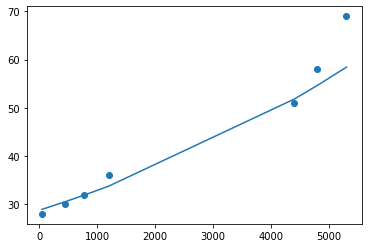

In [ ]:
plt.scatter(xi, yi)
plt.plot(xi, [x[0][0]*np.exp(i*x[1][0]) for i in xi])
plt.show()

In [ ]:
#y = a*x^b
new_x = np.array([3,4,5,6,7,8,9], dtype="float64")
new_y = np.array([11,12,14,18,19,21,23], dtype="float64")

In [ ]:
sigma_y, sigma_yx, sigma_x, sigma_x2 = 0,0,0,0
for i in range(7):
  sigma_x += np.log10(new_x[i])
  sigma_x2 += (np.log10(new_x[i]))**2
  sigma_y += np.log10(new_y[i])
  sigma_yx += np.log10(new_y[i])*np.log10(new_x[i])
print(sigma_x, sigma_x2, sigma_y, sigma_yx)

5.258733037212814 4.124540348960321 8.484675203691735 6.498677178644271


In [ ]:
a = np.array([[7, sigma_x], [sigma_x, sigma_x2]], dtype="float64")
d = np.array([[sigma_y], [sigma_yx]])
x = np.matmul(np.linalg.inv(a), d)
x[0][0] = 10**x[0][0]
x

array([[4.72041248],
       [0.71629716]])

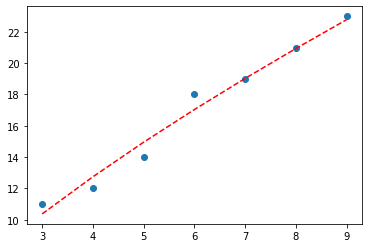

In [ ]:
plt.scatter(new_x, new_y)
plt.plot(new_x, [x[0][0]*(i**x[1][0]) for i in new_x],"--", color = "red")
plt.show()

In [ ]:
#Regula-Falsi method- method of finding roots
x0, x1 = float(input("enter x0:")), float(input("enter x1:"))
f0, f1 = float(input("enter f0:")), float(input("enter f1:")) 
for i in range(7):
  xn = x1 -((x1-x0)/(f1-f0))*f1
  print(f"x{i+2} =", xn)
  fn = xn**4-xn**3-2*xn**2-6*xn-4
  print("f =", fn)
  if f0*fn < 0:
    x1 = xn
    f1 = fn
    print("swapped")
    #swap for new iteration
  else:
    x0 = xn
    f0 = fn
    print("not swapped")

enter x0:2
enter x1:3
enter f0:-16
enter f1:14
x2 = 2.533333333333333
f = -7.106054320987656
not swapped
x3 = 2.690452169127763
f = -1.6983470633786908
not swapped
x4 = 2.7239410229169314
f = -0.3403584069300152
not swapped
x5 = 2.730493090235787
f = -0.06572765910893708
not swapped
x6 = 2.731752467547917
f = -0.012601403073404072
not swapped
x7 = 2.7319937000773127
f = -0.002412605124224143
not swapped
x8 = 2.7320398773605246
f = -0.00046178308495825604
not swapped


In [ ]:
#Newton-Raphson Method- method of finding roots
new_x0 = float(input("enter x0: "))
n = int(input("enter iterations: "))
print(f"f(x0)= {new_x0**3-18}")
x1 = 0
for i in range(n):
  x1 = new_x0 - (new_x0**3-18)/(3*new_x0**2)
  print(f"x{i+1} = ", x1)
  print(f"f(x{i+1}) = ", x1**3-18)
  new_x0 = x1

enter x0: 2.5
enter iterations: 4
f(x0)= -2.375
x1 =  2.6266666666666665
f(x1) =  0.12236562962962694
x2 =  2.6207547504731146
f(x2) =  0.000275205308341242
x3 =  2.6207413942769646
f(x3) =  1.4025332006895042e-09
x4 =  2.6207413942088964
f(x4) =  -3.552713678800501e-15


In [ ]:
#gauss-seidel method
def seidel(a, x ,b): 
	#Finding length of a(3)	 
	n = len(a)				 
	# for loop for 3 times as to calculate x, y , z 
	for j in range(0, n):		 
		# temp variable d to store b[j] 
		d = b[j]				 
		
		# to calculate respective xi, yi, zi 
		for i in range(0, n):	 
			if(j != i): 
				d-=a[j][i] * x[i] 
		# updating the value of our solution		 
		x[j] = d / a[j][j] 
	# returning our updated solution		 
	return x	 

# int(input())input as number of variable to be solved				 
n = 3							
a = []							 
b = []		 
# initial solution depending on n(here n=3)					 
x = [0, 0, 0]						 
a = [[4, -1, -1],[-2, 6, 1],[-1, 1, 7]] 
b = [3,9,-6] 
print(x) 

#loop run for m times depending on m the error value 
for i in range(0, 20):			 
	x = seidel(a, x, b) 
	#print each time the updated solution 
	print(x)					 


[0, 0, 0]
[0.75, 1.75, -1.0]
[0.9375, 1.9791666666666667, -1.005952380952381]
[0.9933035714285715, 1.9987599206349207, -1.00077947845805]
[0.9994951105442178, 1.999961616591081, -1.0000666437209804]
[0.9999737432175252, 2.0000023550260053, -1.0000040874012115]
[0.9999995669061985, 2.0000005368689346, -1.000000138566105]
[1.0000000995757075, 2.0000000562862534, -0.9999999938157923]
[1.0000000156176154, 2.000000004175171, -0.999999998365365]
[1.0000000014524513, 2.000000000211711, -0.9999999998227513]
[1.00000000009724, 2.000000000002872, -0.999999999986519]
[1.0000000000040883, 1.999999999999116, -0.9999999999992897]
[0.9999999999999567, 1.999999999999867, -0.9999999999999872]
[0.9999999999999699, 1.9999999999999878, -1.0000000000000024]
[0.9999999999999962, 1.9999999999999991, -1.0000000000000004]
[0.9999999999999997, 2.0, -1.0]
[1.0, 2.0, -1.0]
[1.0, 2.0, -1.0]
[1.0, 2.0, -1.0]
[1.0, 2.0, -1.0]
[1.0, 2.0, -1.0]


In [ ]:
#divided/forward/backward difference tables
n = int(input("enter no. of terms: "))
table = [[None for x in range(n)] for x in range(n)]
xs= []

print("Enter xs: ")
for i in range(n):
  xs.append(float(input()))

ys = []
print("Enter ys: ")
for i in range(n):
  ys.append(float(input()))
for i in range(n):
  table[i][0] = ys[i]

for j in range(1,n):
  for i in range(n-j):
    table[i][j] = (table[i+1][j-1] - table[i][j-1])#/(xs[i+j]-xs[i])

table_pd = pd.DataFrame(table)
print("------------------")
print("Forward Diff. table: ")
print(table_pd)

enter no. of terms: 4
Enter xs: 
0.5
0.6
0.7
0.8
Enter ys: 
1.3254
1.1532
0.9432
1.0514
------------------
Forward Diff. table: 
        0       1       2      3
0  1.3254 -0.1722 -0.0378  0.356
1  1.1532 -0.2100  0.3182    NaN
2  0.9432  0.1082     NaN    NaN
3  1.0514     NaN     NaN    NaN


In [ ]:
def newton_interpolation(x, y, xi):
    #length/number of datapoints
    n = len(x)
    #divided difference initialization
    fdd = [[None for x in range(n)] for x in range(n)]
    #f(X) values at different degrees
    yint = [None for x in range(n)]
    #error value
    ea = [None for x in range(n)]
    
    #finding divided difference
    for i in range(n):
        fdd[i][0] = y[i]
    for j in range(1,n):
        for i in range(n-j):
            fdd[i][j] = (fdd[i+1][j-1] - fdd[i][j-1])/(x[i+j]-x[i])
    
    #just printing dd here
    fdd_table = pd.DataFrame(fdd)
    print(fdd_table)
    
    #interpolating xi
    xterm = 1
    yint[0] = fdd[0][0]
    for order in range(1, n):
        xterm = xterm * (xi - x[order-1])
        yint2 = yint[order-1] + fdd[0][order]*xterm
        ea[order-1] = yint2 - yint[order-1]
        yint[order] = yint2
    
    #returning a map for pandas dataframe
    return map(lambda yy, ee : [yy, ee], yint, ea)

x = [0.5,0.6,0.7,0.8]
y = [1.3254,1.1532,0.9432,1.0154]
a = newton_interpolation(x, y, 1)
df = pd.DataFrame(a, columns=['f(x)','error'])
print(df)

        0      1      2          3
0  1.3254 -1.722  -1.89  53.333333
1  1.1532 -2.100  14.11        NaN
2  0.9432  0.722    NaN        NaN
3  1.0154    NaN    NaN        NaN
     f(x)  error
0  1.3254 -0.861
1  0.4644 -0.378
2  0.0864  3.200
3  3.2864    NaN


In [ ]:
#Euler's method
x0 = float(input("enter x0: "))
y0 = float(input("enter y0: "))
h = float(input("enter h: "))
n = int(input("enter no. of terms: "))
x = np.array([0.2*i for i in range(n)], dtype="float64")
y = []
for i in range(n):
  y1 = (y0+h*(2*x0*y0))
  y.append(y1)
  y0 = y1
  x0 = x[i]
print(x)
print(y)
print([np.exp(x[i]**2) for i in range(n)])

enter x0: 0
enter y0: 1
enter h: 0.2
enter no. of terms: 5
[0.  0.2 0.4 0.6 0.8]
[1.0, 1.0, 1.08, 1.2528000000000001, 1.5534720000000002]
[1.0, 1.0408107741923882, 1.1735108709918103, 1.4333294145603404, 1.8964808793049517]


In [ ]:
def f(x,y):
  return (2*x*y+np.exp(x))/(x**2-x*np.exp(x))

In [ ]:
y_mod = []
for i in range(n):
  y_1 = y0+(h/2)*(f(x[i], y0)+f(x[i]+h, y0+h*(f(x[i], y0))))
  y_mod.append(y_1)
  y0 = y_1
print(y_mod)

[-2.0241850842847136, -2.0611263431902405, -2.0872897982337477, -2.1032099027426656, -2.109783945571798]


In [ ]:
#runge kutta 4th order
x0 = float(input("enter x0: "))
y0 = float(input("enter y0: "))
h = float(input("enter h: "))
n = int(input("enter no. of terms: "))
x = np.array([1.2,1.4,1.6,1.8,2.0], dtype="float64")

y_4 = []
y = y0
for i in range(n):
  k1 = h*f(x0,y)
  k2 = h*f(x0+h/2, y+k1/2)
  k3 = h*f(x0+h/2, y+k2/2)
  k4 = h*f(x0+h, y+k3)
  y_new = (y+(k1+2*(k2+k3)+k4)/6)
  y_4.append(y_new)
  y = y_new
  x0 = x[i]
  print(k1,k2,k3,k4)

print(y_4)

enter x0: 1
enter y0: 0
enter h: 0.2
enter no. of terms: 5
-0.3163953413738653 -0.2536191329988301 -0.2602126975919982 -0.21190705880475602
-0.21207403463314126 -0.17657615767051005 -0.17957264835466746 -0.1520616736668598
-0.1520868461533057 -0.13135101351216122 -0.13274189177961201 -0.11647337537869332
-0.11646751637504973 -0.1038940325773595 -0.1045603632117108 -0.09453706817470654
-0.09452842123222881 -0.08658822234793045 -0.08692003906390955 -0.08047179326201769
[-0.25932767689337965, -0.4387332302851057, -0.5715242356376966, -0.6761764649923461, -0.7631792545453339]


In [ ]:
#statistics beginning
############################
def sd(x):
  sum,mean = 0,0
  for i in x:
    mean+=i/len(x)
  for i in x:
    sum+=(i-mean)**2
  sd = sum/(len(x)-1)
  return sd**0.5

In [ ]:
from statistics import *

In [ ]:
def covariance(x,y):
  x_mean, y_mean = mean(x), mean(y)
  sum = 0
  for i in range(len(x)):
    sum+=(x[i]-x_mean)*(y[i]-y_mean)
  return sum/(len(x)-1)

In [ ]:
def correlation(x,y):
  cov = covariance(x,y)
  return cov/(sd(x)*sd(y))

In [ ]:
a = [10,12,13,12,16,15]
b = [40,38,43,45,37,43]
print(f"sd(a)={sd(a)} \nsd(b) = {sd(b)}\ncov(a,b)={covariance(a,b)}\ncorr(a,b)={correlation(a,b)}")

sd(a)=2.1908902300206643 
sd(b) = 3.1622776601683795
cov(a,b)=-1.2
corr(a,b)=-0.17320508075688773


In [ ]:
def regression(x,y):
  corr = correlation(x,y)
  b_yx = corr*sd(y)/sd(x)
  b_xy = corr*sd(x)/sd(y)
  print(f"regression coefficient b(yx):{b_yx}\nregression coefficient b(xy):{b_xy}")

In [ ]:
regression(a,b)

regression coefficient b(yx):-0.25000000000000006
 regression coefficient b(xy):-0.11999999999999998


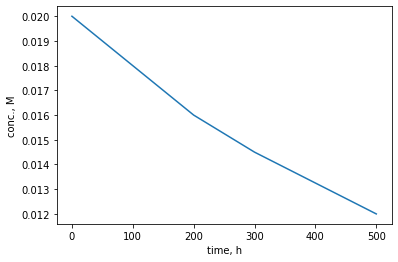

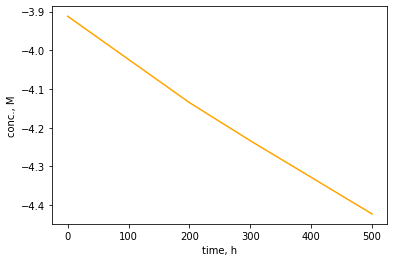

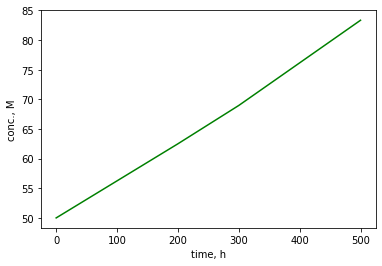

In [ ]:
x = np.array([0,200,300,500], dtype='float64')
y = np.array([0.02,0.016,0.0145,0.012], dtype = "float64")
plt.plot(x,y)
plt.xlabel("time, h")
plt.ylabel("conc., M")
plt.show()
plt.plot(x,np.log(y), color="orange")
plt.xlabel("time, h")
plt.ylabel("conc., M")
plt.show()
plt.plot(x, 1/y, color="green")
plt.xlabel("time, h")
plt.ylabel("conc., M")
plt.show()